# 그래프 그리기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings( 'ignore' )

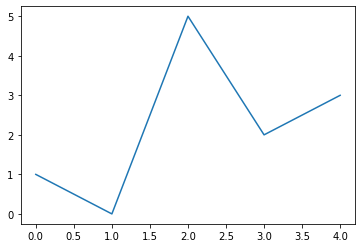

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot([1, 0, 5, 2, 3])
plt.show()

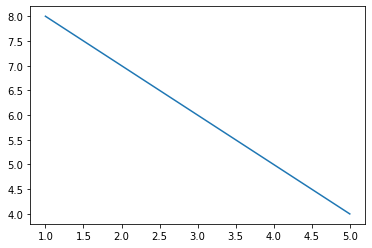

In [4]:
dict1 = {'v1' : [1, 2, 3, 4, 5], 
         'v2' : [8, 7, 6, 5, 4]}
plt.plot('v1', 'v2', data = dict1)
plt.show() # dictionary 형태로 그래프그리기

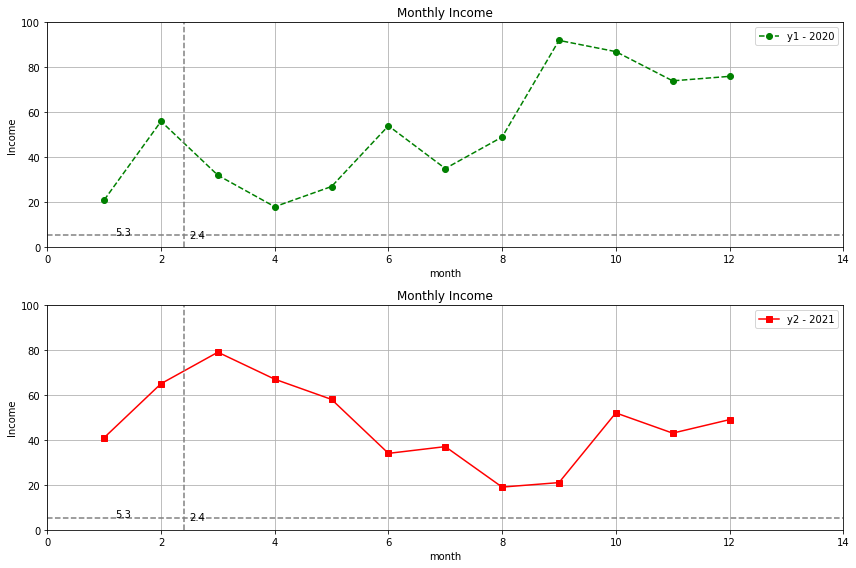

In [31]:
dict1 = {'x':[1,2,3,4,5,6,7,8,9,10,11,12], 'y1':[21,56,32,18,27,54,35,49,92,87,74,76], 'y2':[41,65,79,67,58,34,37,19,21,52,43,49]}

plt.figure(figsize = (12, 8)) # default size는 6.4, 4.4
plt.subplot(2,1,1) # 2행 1열의 첫번째 그래프
plt.plot('x', 'y1', 'go--', data = dict1, label = 'y1 - 2020')
plt.xlabel('month') # x범례 추가
plt.ylabel('Income') # y범례 추가
plt.title('Monthly Income') # 제목 추가
plt.xlim(0, 14) # 끝 조절
plt.ylim(0, 100) # 끝 조절
plt.legend() # 범례를 띄워줌
plt.grid() # 격자추가
plt.axhline(5.3, color = 'grey', linestyle = '--') # 수평선 추가
plt.axvline(2.4, color = 'grey', linestyle = '--') # 수직선 추가
plt.text(2.5, 4.2, '2.4') # 그래프에 텍스트 추가
plt.text(1.2, 5.4, '5.3') # 그래프에 텍스트 추가
plt.tight_layout() # 그래프간 간격을 서로 딱 붙게 해줌

plt.subplot(2,1,2) # 2행 2열의 두번째 그래프
plt.plot('x', 'y2', 'rs-', data = dict1, label = 'y2 - 2021') # label을 추가, rs-, gp--는 색과 선 형태 지정
plt.xlabel('month') # x범례 추가
plt.ylabel('Income') # y범례 추가
plt.title('Monthly Income') # 제목 추가
plt.xlim(0, 14) # 끝 조절
plt.ylim(0, 100) # 끝 조절
plt.legend() # 범례를 띄워줌
plt.grid() # 격자추가
plt.axhline(5.3, color = 'grey', linestyle = '--') # 수평선 추가
plt.axvline(2.4, color = 'grey', linestyle = '--') # 수직선 추가
plt.text(2.5, 4.2, '2.4') # 그래프에 텍스트 추가
plt.text(1.2, 5.4, '5.3') # 그래프에 텍스트 추가
plt.tight_layout() # 그래프간 간격을 서로 딱 붙게 해줌

plt.show()

<img src = "KakaoTalk_20220821_210812974.png" width = "1400" height = "700">

#### Business Understanding
- 비즈니스 목표에서 데이터 분석 목표로 순차적으로 내려가야함
#### Data Understanding
- 있는 데이터, 없는 데이터를 구분
    - 있는 데이터 --> 바로 사용가능한 데이터, 가공해야 사용가능한 데이터
        - 검토 및 과제수행
    - 없는 데이터 --> 취득 가능한 데이터, 취득 불가능한 데이터
        - 취득 가능시 --> 취득 비용 산정 후 과제 행
        - 취득 불가능시 --> 의미정리, 정보 분할, 최대한 가용가능하게
#### Data Preparation
- 결측치 조치, 가변수화, 스케일링

## **데이터 전처리시 알아둬야 할 것**
        1. 모든 셀은 값이 있어야 한다 (NaN 제거 필수)
        2. 모든 값은 숫자여야 한다 (가변수화)
        3. (필요에 따라) 숫자의 범위를 일치 (스케일링)
#### Modeling
#### Evaluation
#### Deployment

# 타이타닉 데이터로 각종 그래프 그리고, 전처리 해보기

In [6]:
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
print(titanic['Age'].mean()) # 평균
print(titanic['Age'].mode()) # 최빈값
print(titanic['Age'].median()) # 중앙값
# print(np.percentile(titanic['Age'].notnull(), [0, 25, 50, 75, 100]))
temp = titanic.loc[titanic['Age'].notnull(), 'Age']
print(np.percentile(temp, [0, 25, 50, 75, 100])) # 4분위수, Age에 NaN값이 존재해서 바로 위에서 제거해줌


29.69911764705882
0    24.0
Name: Age, dtype: float64
28.0
[ 0.42  20.125 28.    38.    80.   ]


# 꿀팁

- 요소개수 / 행의개수 --> titanic['Embarked'].value_counts() / titanic.shape[0]
- 범주형 데이터는 집계를 먼저하고 차트를 그림
- temp = titanic['Pclass'].value_counts() <-- 얘는 시리즈, 인덱스 둘다있음
    - 따라서 temp.index, temp.values로 원하는 것만 따로 빼줘야됨
- plt.bar(temp.index, temp.values)하고 show하면 바 그래프를 그려줌
- plt.barh하면 가로로 나옴

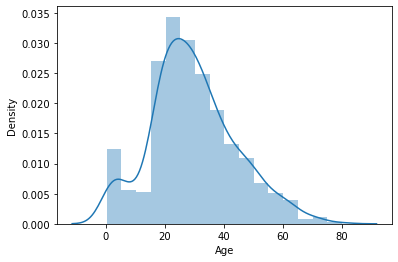

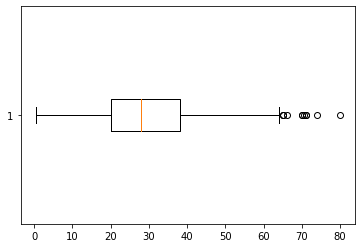

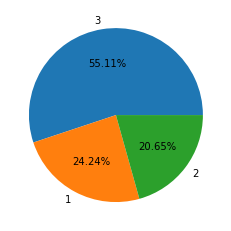

In [8]:
sns.distplot(temp, hist = True, bins = 16) # 밀도함수, 히스토그램을 한 화면에 띄워줌
plt.show()

plt.boxplot(temp, vert = False) # True로 하면 세로로 그려짐 아래 설명은 True 기준
plt.show() # 사각형 아래변은 1사분위수, 가운데는 중앙값, 윗변은 3사분위수, 점은 max / min 값
# 중요 : 아래 선은 min과 (1사분위값 - 1.5 X IQR)을 비교해서 큰값, 윗선은 max와 (3사분위값 + 1.5 X IQR)을 비교해서 작은값 (IQR = 3사분위수 - 1사분위수)

temp1 = titanic['Pclass'].value_counts() # 범주별 비율 비교
plt.pie(temp1.values, labels = temp1.index, autopct = '%.2f%%') # startangle = 90 --> 90도부터 시작, counterclockwise = False --> 시계방향
plt.show()

# seaborn 사용법

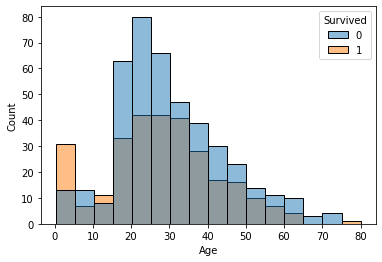

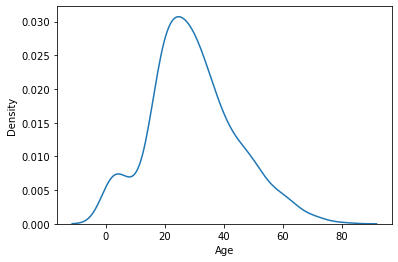

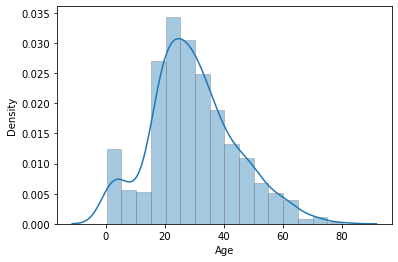

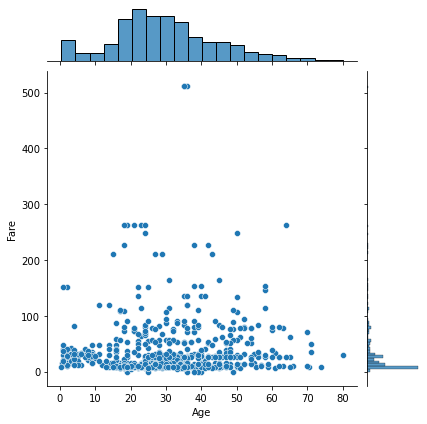

In [9]:
sns.histplot(data = titanic, x = 'Age', bins = 16, hue = 'Survived') # 히스토그램, hue넣으면 저거별로 보여줌
plt.show()

sns.kdeplot(data=titanic, x='Age') # 밀도함수
plt.show()

sns.distplot(titanic['Age'], bins = 16, hist_kws = dict(edgecolor='gray')) # .hist_kwx --> 중간에 회색선 넣어줌
plt.show()

sns.jointplot(x = 'Age', y = 'Fare', data = titanic)
plt.show()

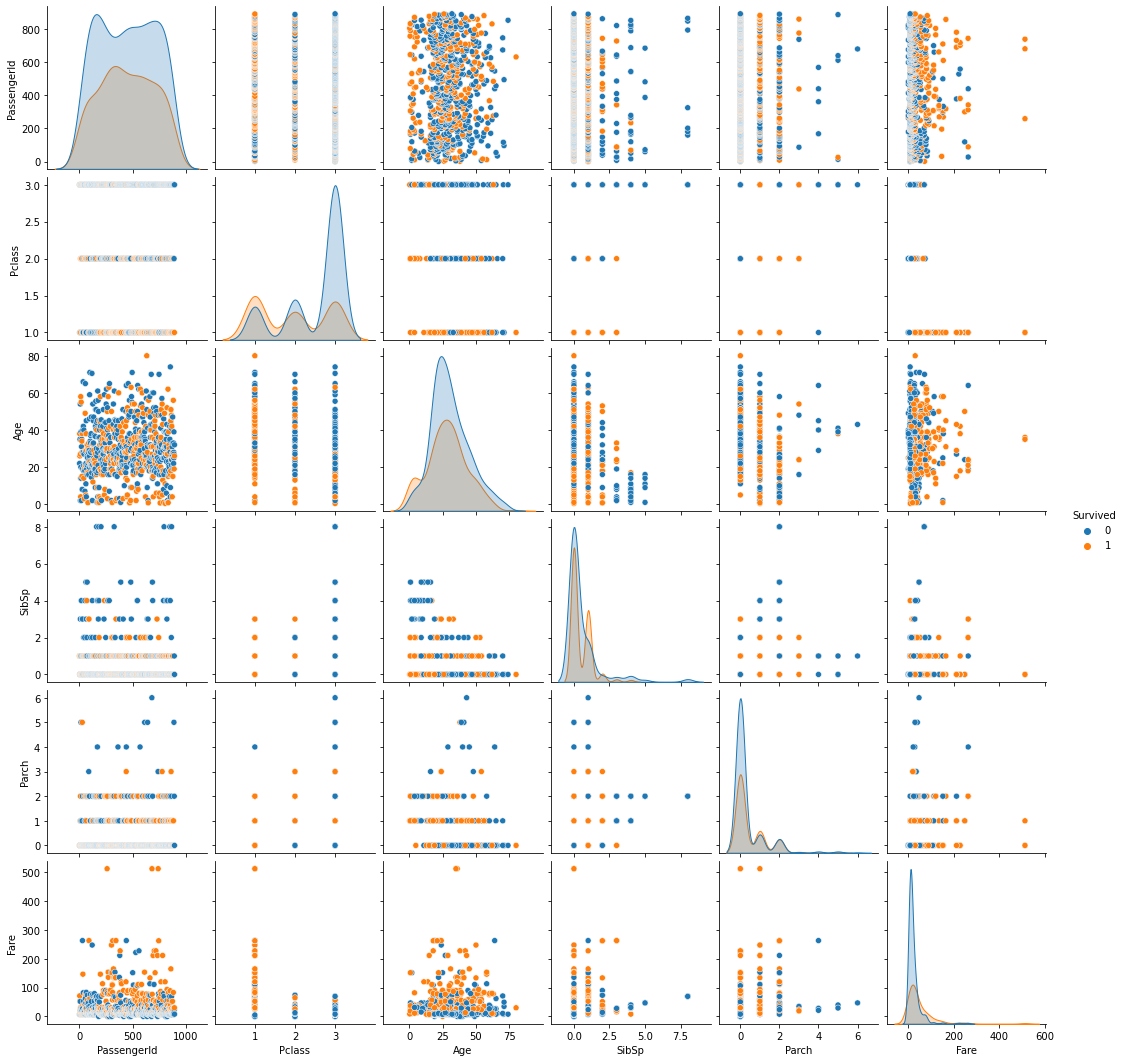

In [12]:
sns.pairplot(titanic, hue='Survived') # 싹다 그려줌, 근데 매우 오래걸림
plt.show()

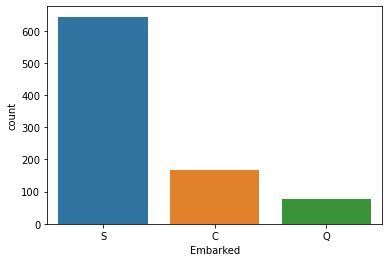

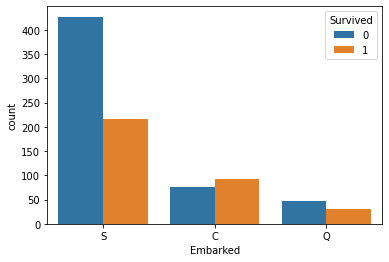

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

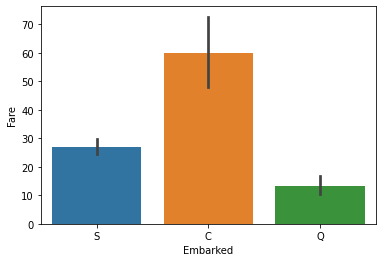

In [17]:
sns.countplot(x = 'Embarked', data = titanic) # 집계 + barplot 그리기를 동시에 해줌
plt.show()

sns.countplot(x = 'Embarked', data = titanic, hue = 'Survived') # 이러면 Survival별로 그려줌
plt.show()

sns.barplot(x = 'Embarked', y = 'Fare', data = titanic) # 애는 그냥 barplot이 아니라 범주별 숫자의 평균을 비교해줌
# 회색은 신뢰구간, 그냥 가로는 각 컬럼의 평균
plt.plot()

# heatmap 그리기

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


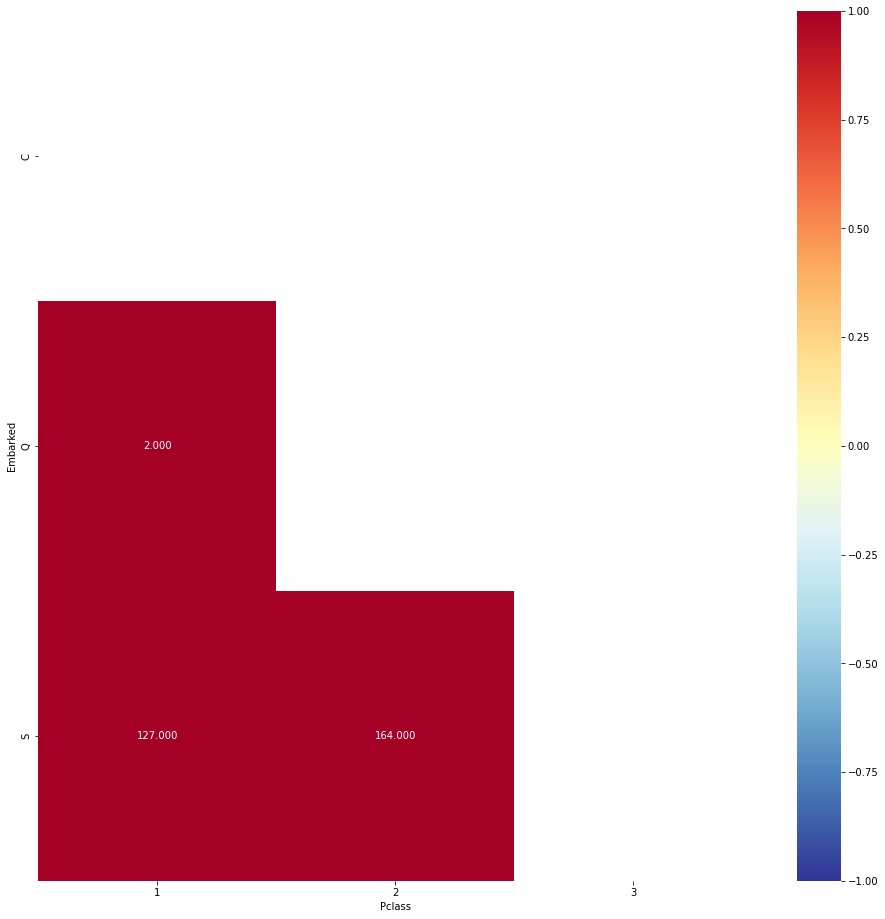

In [30]:
temp1 = titanic.groupby(['Embarked', 'Pclass'], as_index = False)['PassengerId'].count()
temp2 = temp1.pivot('Embarked', 'Pclass','PassengerId')
display(temp2)

plt.figure(figsize = (16, 16))
# mask = np.zeros_like(temp2.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(temp2, annot = True, fmt = '.3f', mask = mask, cmap = 'RdYlBu_r',  vmin = -1, vmax = 1) # fmt는 e+05로 표시되는거 바꿔줌
plt.show()